In [2]:
# imports libraries
from ultralytics import YOLO
import torch
import cv2 as cv
import matplotlib.pyplot as plt
import os

import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

from src.data.visualize import drawRects


image 1/1 /home/osurasenith/Projects/third-umpire-decision-automation/backend/experiments/data/test/Screenshot 2023-03-30 081506.jpg: 352x640 1 Batsmen, 91.2ms
Speed: 0.4ms preprocess, 91.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


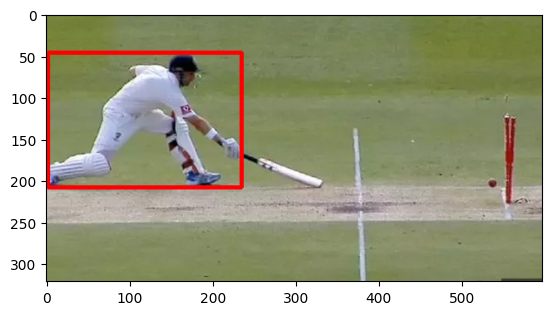

In [4]:
# Loads the model
best_weights_path = "../../training-jobs/detect/object-detect-dataset-1/weights/best.pt"
model = YOLO(best_weights_path)

# image_path = "../data/Cricket-Semantic-Segmentation/object-detect/images/train/2022-08-24 (350).png"
# image_path = "../data/test/Runout-scenario-in-a-cricket-match.jpg"
image_path = "../data/test/Screenshot 2023-03-30 081506.jpg"

# makes the prediction
res = model.predict(image_path)

# create box annotations
result = res[0].boxes
cls = result.cls
xywh = result.xywhn
cls_col = cls.reshape((-1, 1))
annotations = torch.cat((cls_col, xywh), dim=1).tolist()

# load the image
img = cv.cvtColor(cv.imread(image_path), cv.COLOR_BGR2RGB)

# draw the annotations
drawn_img = drawRects(img, annotations)

# show the drawn image
plt.imshow(drawn_img)
plt.show()

In [14]:
success = model.export(format='onnx')
onnx_path = "../../training-jobs/detect/object-detect-dataset-1/weights/best.onnx"
!cp $onnx_path ../../app

Ultralytics YOLOv8.0.79 🚀 Python-3.10.6 torch-2.0.0+cu117 CPU

PyTorch: starting from ../../training-jobs/detect/object-detect-dataset-1/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (5.9 MB)
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(

ONNX: starting export with onnx 1.13.1 opset 17...
ONNX: export success ✅ 0.5s, saved as ../../training-jobs/detect/object-detect-dataset-1/weights/best.onnx (11.7 MB)

Export complete (0.7s)
Results saved to /home/osurasenith/Projects/third-umpire-decision-automation/backend/training-jobs/detect/object-detect-dataset-1/weights
Predict:         yolo predict task=detect model=../..

============= Diagnostic Run torch.onnx.export version 2.0.0+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

